In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection

import pims
import trackpy as tp

In [2]:
vid_path = "./data/videos/individual-rotifer/"
vid_filename = "2024_0205_094407_006_3sec.mp4"
frames_filepaths = f"./data/images/{vid_filename.split('.')[0]}/"
zfill_ = 5

EXTRACT_FRAMES = False
if EXTRACT_FRAMES:
    os.makedirs(frames_filepaths, exist_ok=True)
    video = cv2.VideoCapture(f"{vid_path}{vid_filename}")
    frame_counter = 0
    while True:
        ret, frame = video.read()
        if not ret:
            break
        if frame_counter % 1 == 0:
            cv2.imwrite(f"{frames_filepaths}/frame_{str(frame_counter).zfill(zfill_)}.jpg", frame)  
        frame_counter += 1
    video.release()


# 1. Paths and Read-In

In [31]:
vid_path = "./data/videos/individual-rotifer/"
vid_filename = "2024_0205_094407_006_3sec.mp4"
vid_filepath = f"{vid_path}{vid_filename}"
frames_filepaths = f"./data/images/{vid_filename.split('.')[0]}/"

img_seq_folder = f"{frames_filepaths}/*.jpg"
frames = pims.as_grey(pims.open(img_seq_folder))
frame_shape = frames[0].shape

# Time vector
fps = 60
num_frames = len(frames)
time = np.linspace(0, num_frames / fps, num_frames)
tmax = max(time)

frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /Users/mikehemberger/Documents/vscode/rotifer-locomotion/data/images/2024_0205_094407_006_3sec/*.jpg
    Length: 150 frames
    Frame Shape: (1080, 1920, 3)
    Pixel Datatype: uint8

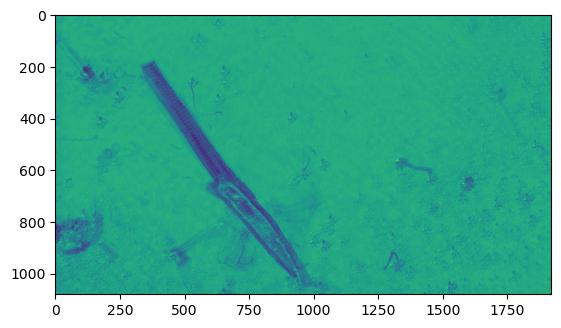

In [86]:
# FASTEST BY FAR
subtract_frame_idx = 0
subtract_frame = frames[subtract_frame_idx]
process_frames = np.arange(subtract_frame_idx + 1, num_frames)

zproj = []
for nth in process_frames:
    zproj.append(frames[nth] - subtract_frame)
    #zproj.append(frames[nth])


zproj = np.stack(zproj)
zproj = np.min(zproj, axis=0)
#zproj = np.mean(zproj, axis=0)

plt.imshow(zproj)

In [101]:
subtract_frame_interval = 20
subtract_frame_idx = 0

subtract_frame_indices = np.arange(subtract_frame_idx, num_frames - subtract_frame_interval + 1, subtract_frame_interval)
proj_series = []
for idx in subtract_frame_indices:
    subtract_frame = frames[idx]
    process_frames = np.arange(idx + 1, idx + 1 + subtract_frame_interval - 1) #print(process_frames)
    
    zproj = []
    for nth in process_frames:
        zproj.append(frames[nth] - subtract_frame)

    zproj = np.stack(zproj)
    zproj = np.min(zproj, axis=0)
    proj_series.append(zproj)

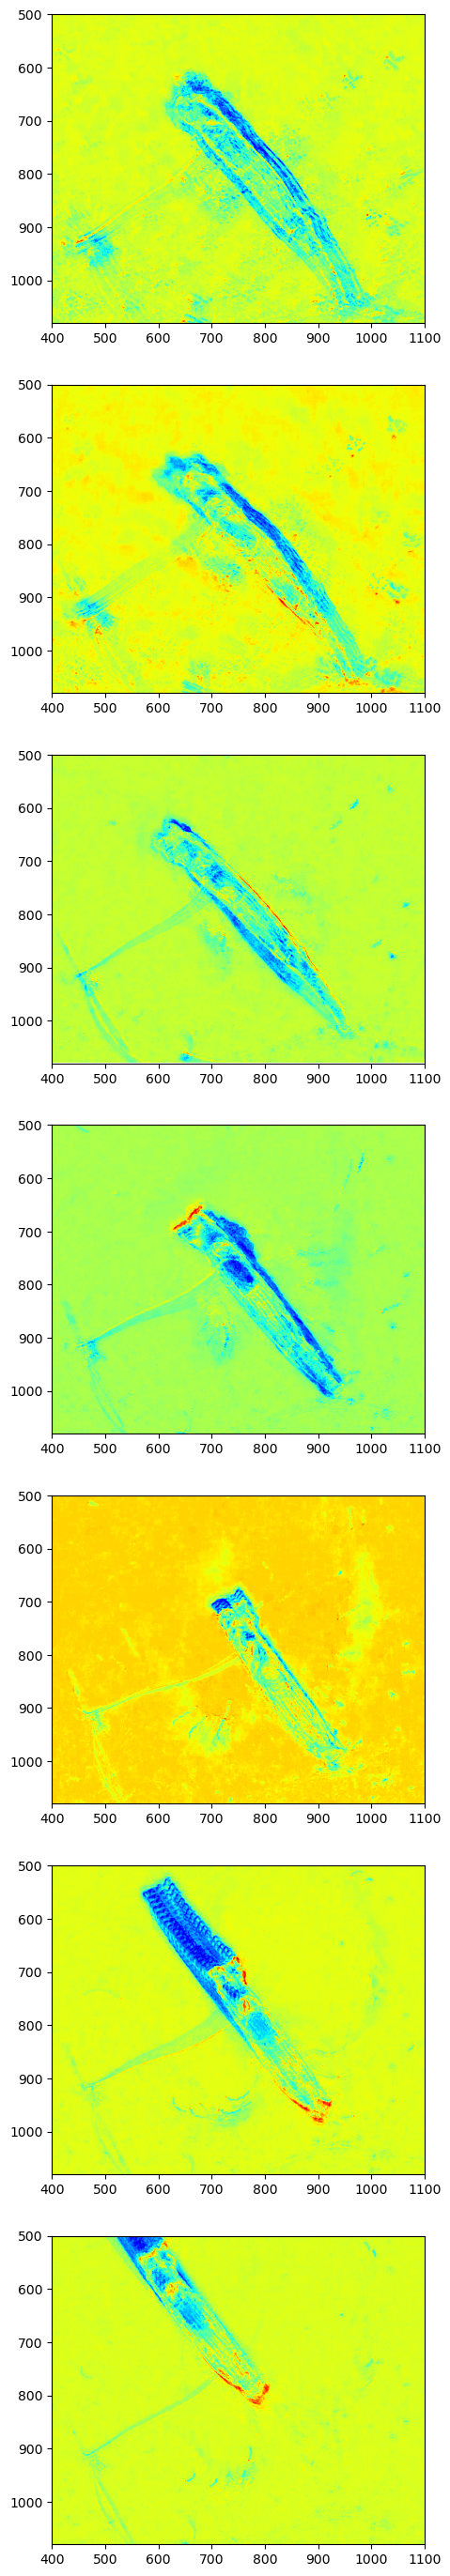

In [102]:
fig, ax = plt.subplots(len(proj_series), 1, figsize=(25,35))

for nth, proj in enumerate(proj_series):
    ax[nth].imshow(proj, cmap="jet") #  vmin=np.min(proj), vmax=0, 
    ax[nth].set_xlim(400,1100); ax[nth].set_ylim(500,1080)
    ax[nth].invert_yaxis()

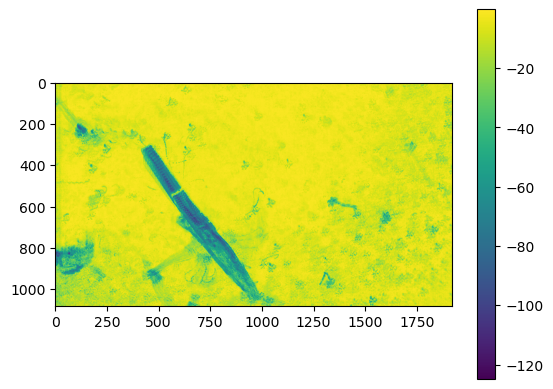

In [103]:
proj_mean = np.min(np.stack(proj_series), axis=0)
plt.imshow(proj_mean); #vmin=-30, vmax=0
plt.colorbar()